# **Concrete Compressive Strength Prediction**

**Problem Statement:** Predictive Modeling of Concrete Compressive Strength

Concrete is the most vital material in civil engineering. The Compressive Strength of concrete is a highly non-linear function of its age and ingredients. Traditionally, to determine strength, engineers must perform "Cylinder Break Tests" where concrete is cast and allowed to cure for 28 days before being crushed in a lab to find its limit.

# 1. Data Description
The dataset we are using is the "Concrete Compressive Strength" dataset. It consists of 1030 instances and 9 attributes, including the target variable, compressive strength. Here's a brief overview of the dataset columns:

🟢**Cement (kg/m^3):** The amount of cement in the concrete mixture.

🟢 **Blast Furnace Slag (kg/m^3):** The amount of blast furnace slag in the concrete mixture.

🟢 **Fly Ash (kg/m^3):** The amount of fly ash in the concrete mixture.

🟢 **Water (kg/m^3):** The amount of water in the concrete mixture.

🟢 **Superplasticizer (kg/m^3):** The amount of superplasticizer in the concrete mixture.

🟢 **Coarse Aggregate (kg/m^3):** The amount of coarse aggregate in the concrete mixture.

🟢 **Fine Aggregate (kg/m^3):** The amount of fine aggregate in the concrete mixture.

🟢 **Age (days):** The curing age of the concrete (in days).

🟢 **Compressive Strength (MPa):** The target variable representing the concrete's compressive strength.

# 2. Importing the packages

In [95]:
# 1. Core Data and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Preprocessing and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 3. Linear and Baseline Models
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge

# 4. Non-Linear and Ensemble Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# 5. High-Performance Boosting Models
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


In [96]:
# Readding the datasets
data = pd.read_csv("/content/Concrete Compressive Strength.csv")

In [97]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


# 3. Data Cleaning and Data Preprocessing

In [98]:
# Checking the descriptive statistics for the dataset.
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cement                          1030 non-null   float64
 1   Blast Furnace Slag              1030 non-null   float64
 2   Fly Ash                         1030 non-null   float64
 3   Water                           1030 non-null   float64
 4   Superplasticizer                1030 non-null   float64
 5   Coarse Aggregate                1030 non-null   float64
 6   Fine Aggregate                  1030 non-null   float64
 7   Age (day)                       1030 non-null   int64  
 8   Concrete compressive strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [100]:
# Checking the missing values in the datasets

data.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age (day),0
Concrete compressive strength,0


Result : there is no any missing values in the data

In [101]:
# Now checkng for any outliers
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


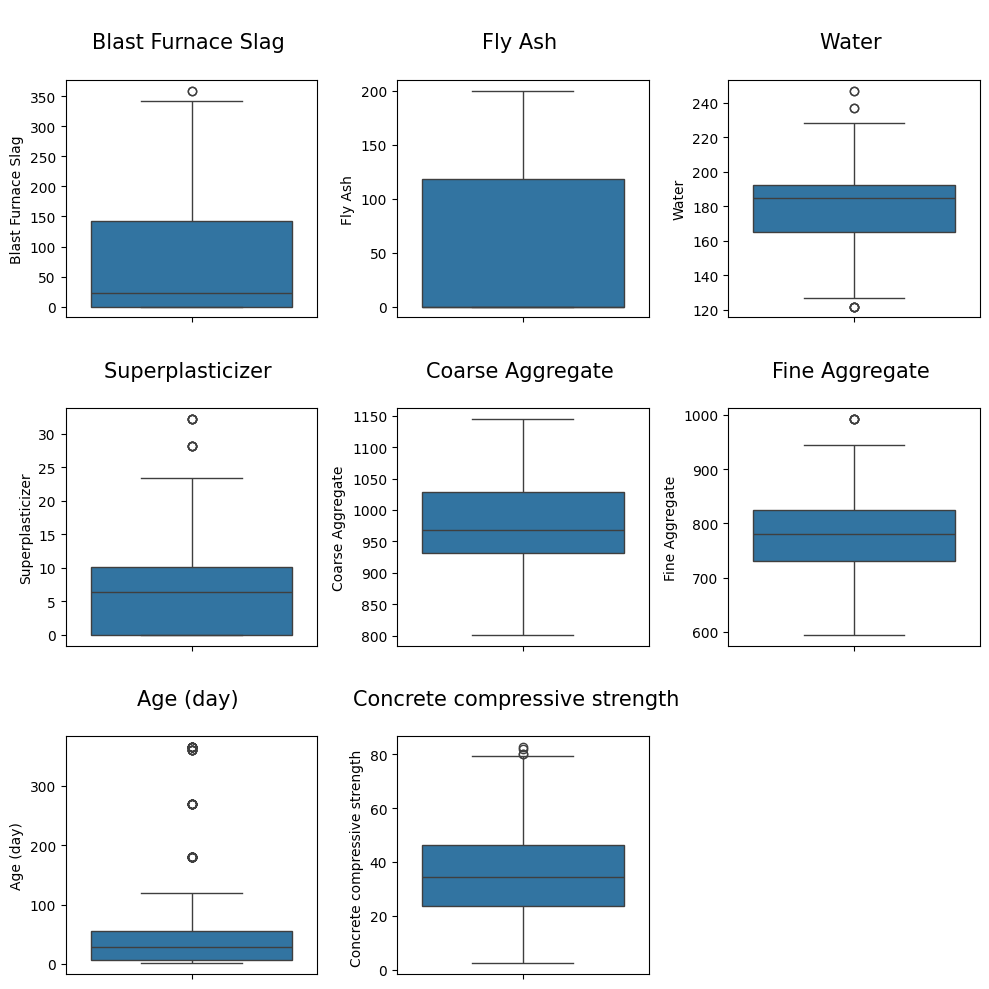

In [102]:
cols = data.columns

plt.figure(figsize=(10, 10))

plotnumber = 1

for i in range(1, len(cols)):
  if plotnumber <= 9:
    ax = plt.subplot(3, 3, plotnumber)
    sns.boxplot(y = cols[i], data = data, ax = ax)
    plt.title(f"\n{cols[i]} \n", fontsize = 15)
  plotnumber += 1
plt.tight_layout()
plt.show()

/tmp/ipython-input-1072213576.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
/tmp/ipython-input-1072213576.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
/tmp/ipython-input-1072213576.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in 

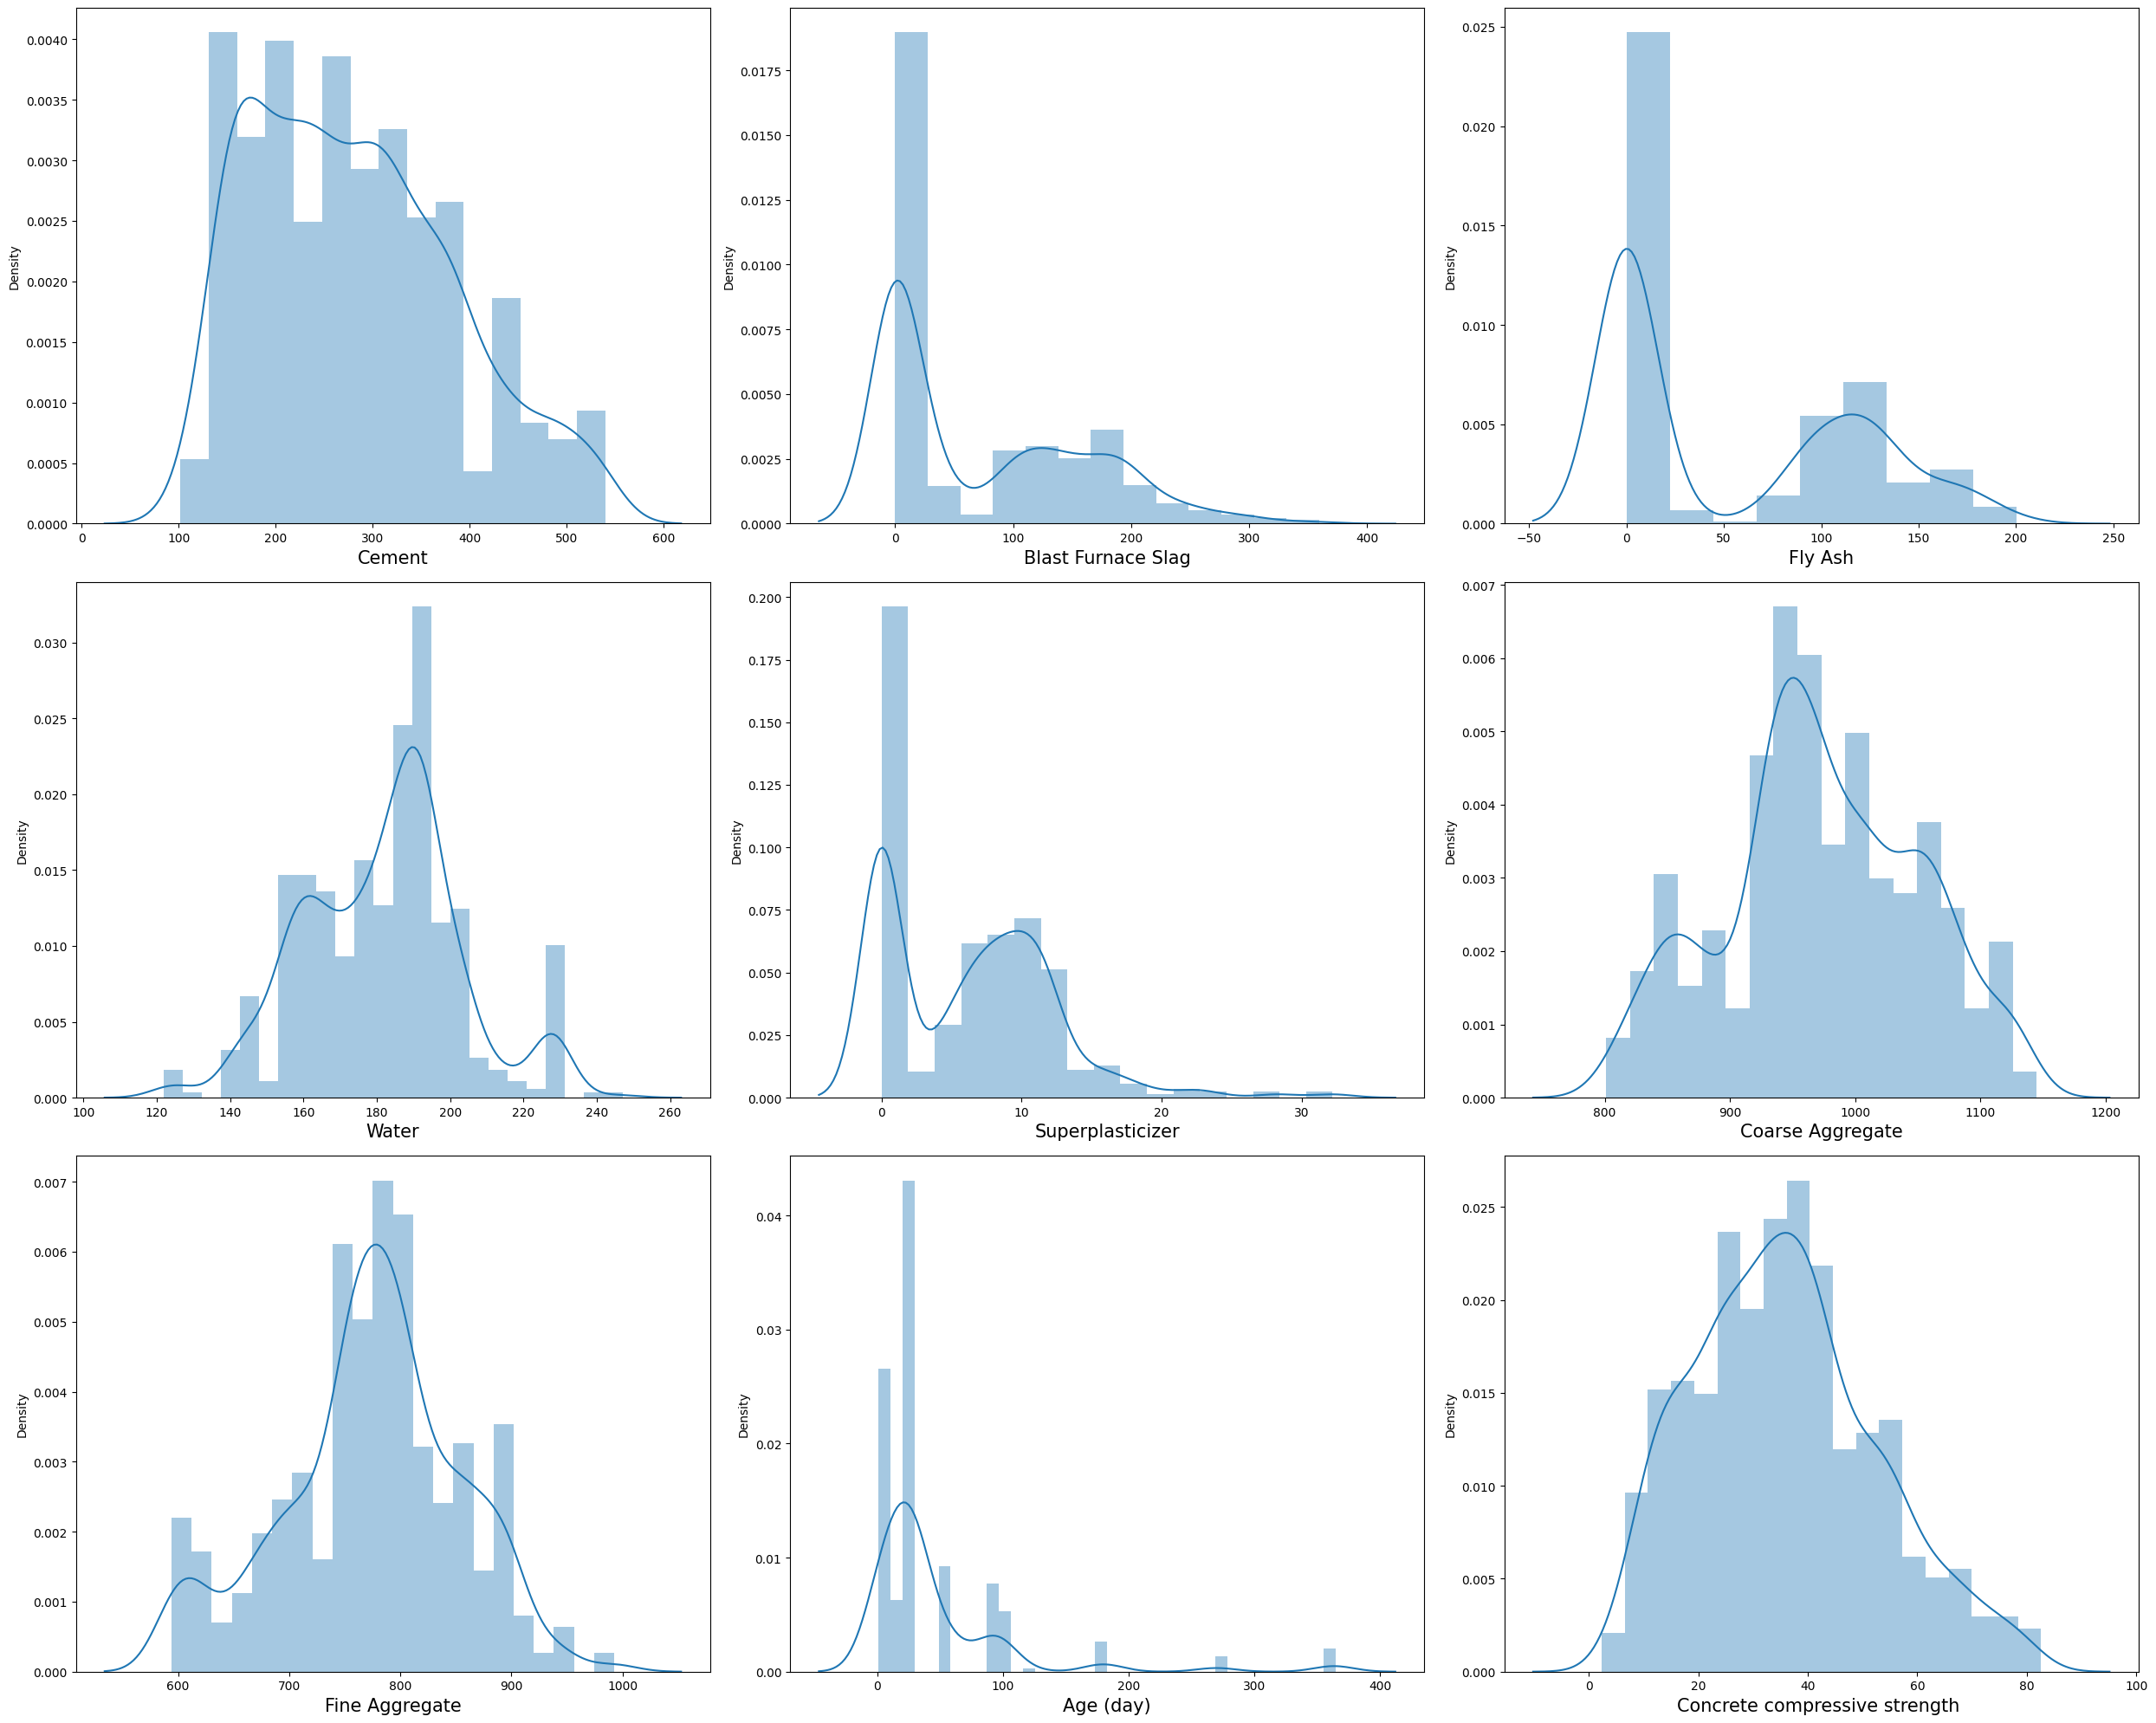

In [103]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in data.columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

Result: I can see som outliers are present in water, Superplasticizer and Age columns.

# 4. Exploratory Data Analysis (EDA)

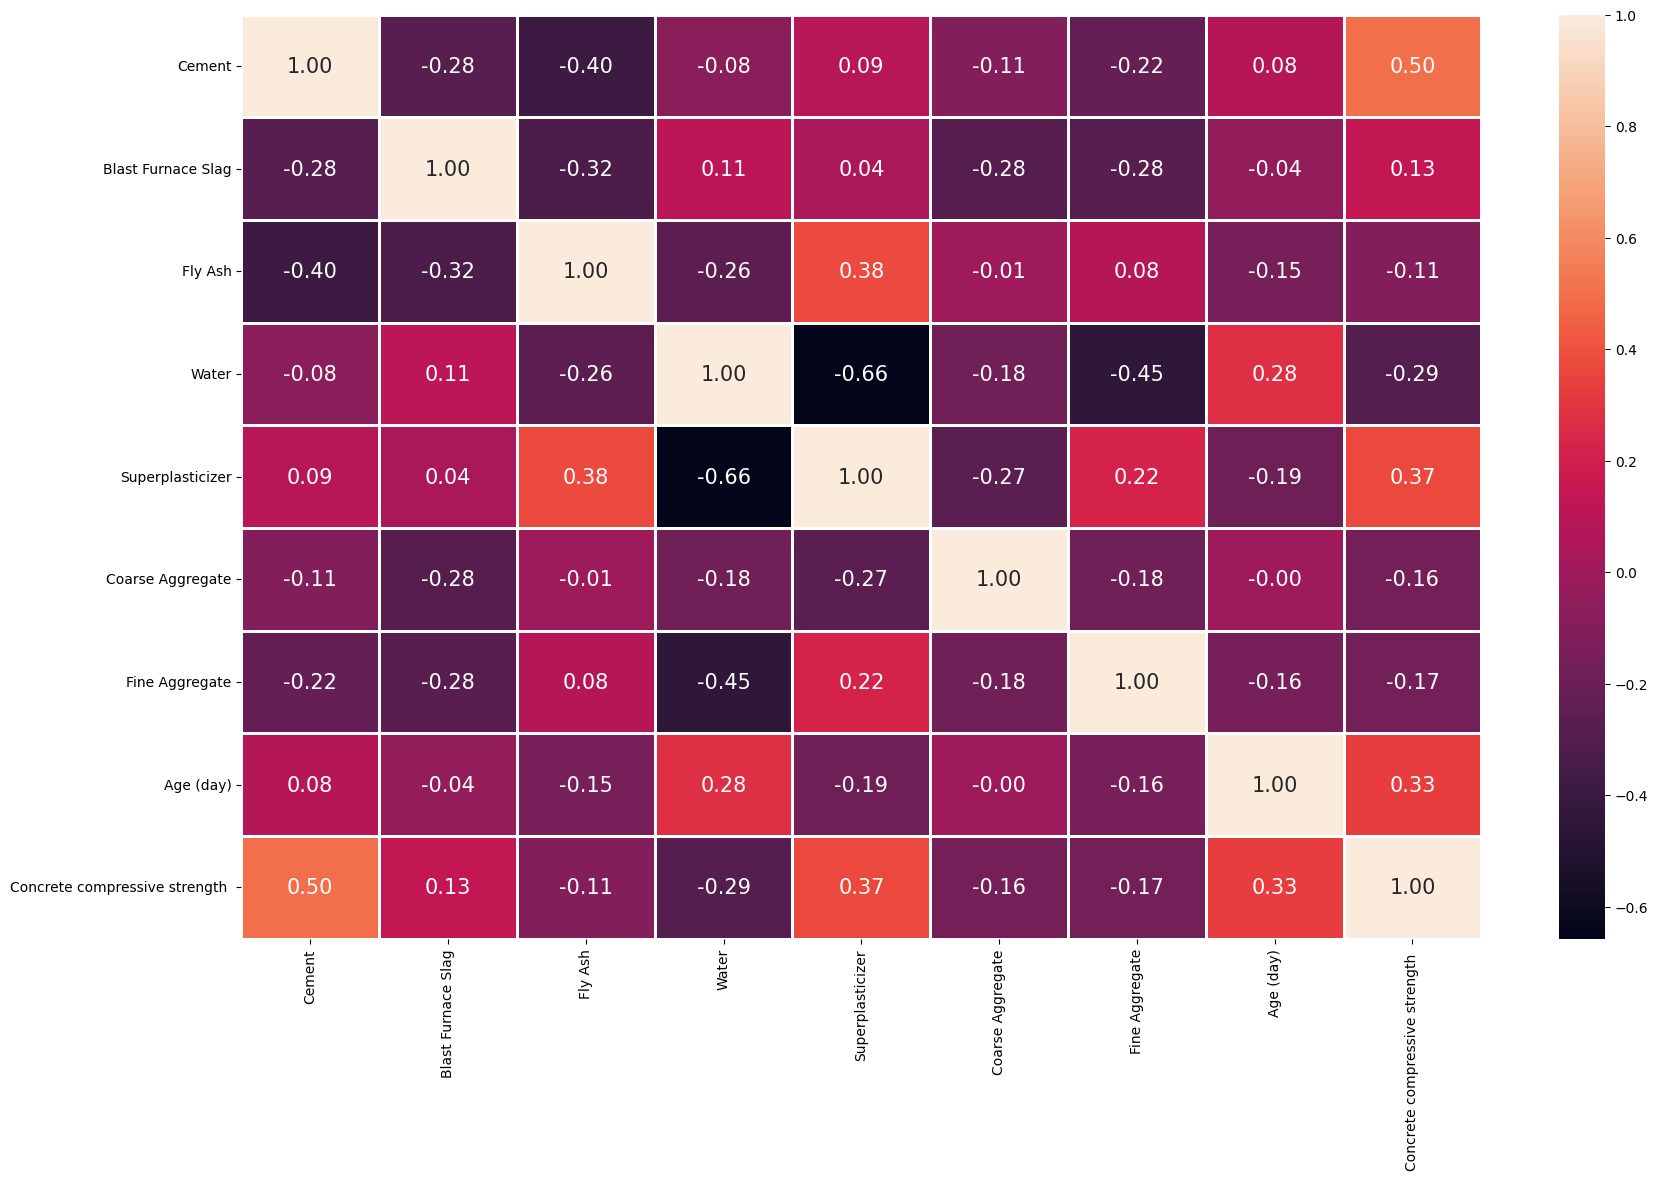

In [104]:
# Checking the correlation between the data
plt.figure(figsize = (20, 12))
sns.heatmap(data.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'white')
plt.show()

**1. Top Positive Drivers of Strength**
These variables have a direct positive relationship with the target; as they increase, the strength tends to increase.

**Cement (0.50):** This is the strongest individual predictor. A correlation of 0.50 indicates that cement content is the primary factor in determining the final strength of the concrete.

**Superplasticizer (0.37):** This has a moderate positive correlation. These chemical additives allow for less water while maintaining workability, which leads to denser, stronger concrete.

**Age (0.33):** Strength develops over time as the chemical hydration process continues. A value of 0.33 confirms that the longer the concrete cures, the stronger it typically becomes.



**2. Significant Negative Relationships**
Negative correlation means as one variable goes up, the other tends to go down.

**Water vs. Superplasticizer (-0.66):** This is the strongest relationship in your entire matrix. It confirms that the more superplasticizer you use, the less water is required in the mix.

**Water vs. Concrete Strength (-0.29):** This inverse relationship is a fundamental law in civil engineering (Abrams' Law). Excess water creates pores or voids in the hardened concrete, which significantly weakens the overall structure.

**Cement vs. Fly Ash (-0.40):** This indicates that in many mixtures, Fly Ash is being used as a partial replacement for cement rather than just an extra ingredient.


**3. Weak or Negligible Relationships**
**Coarse Aggregate (-0.16) and Fine Aggregate (-0.17):** These show very weak negative correlations with strength. While they provide the "bulk" of the concrete, their exact quantity (within the standard range) doesn't influence strength nearly as much as the cement-to-water ratio does.

**Blast Furnace Slag (0.13):** This has a very weak positive correlation. It suggests that while Slag contributes to strength, its impact in this specific dataset is minor compared to the main ingredients.

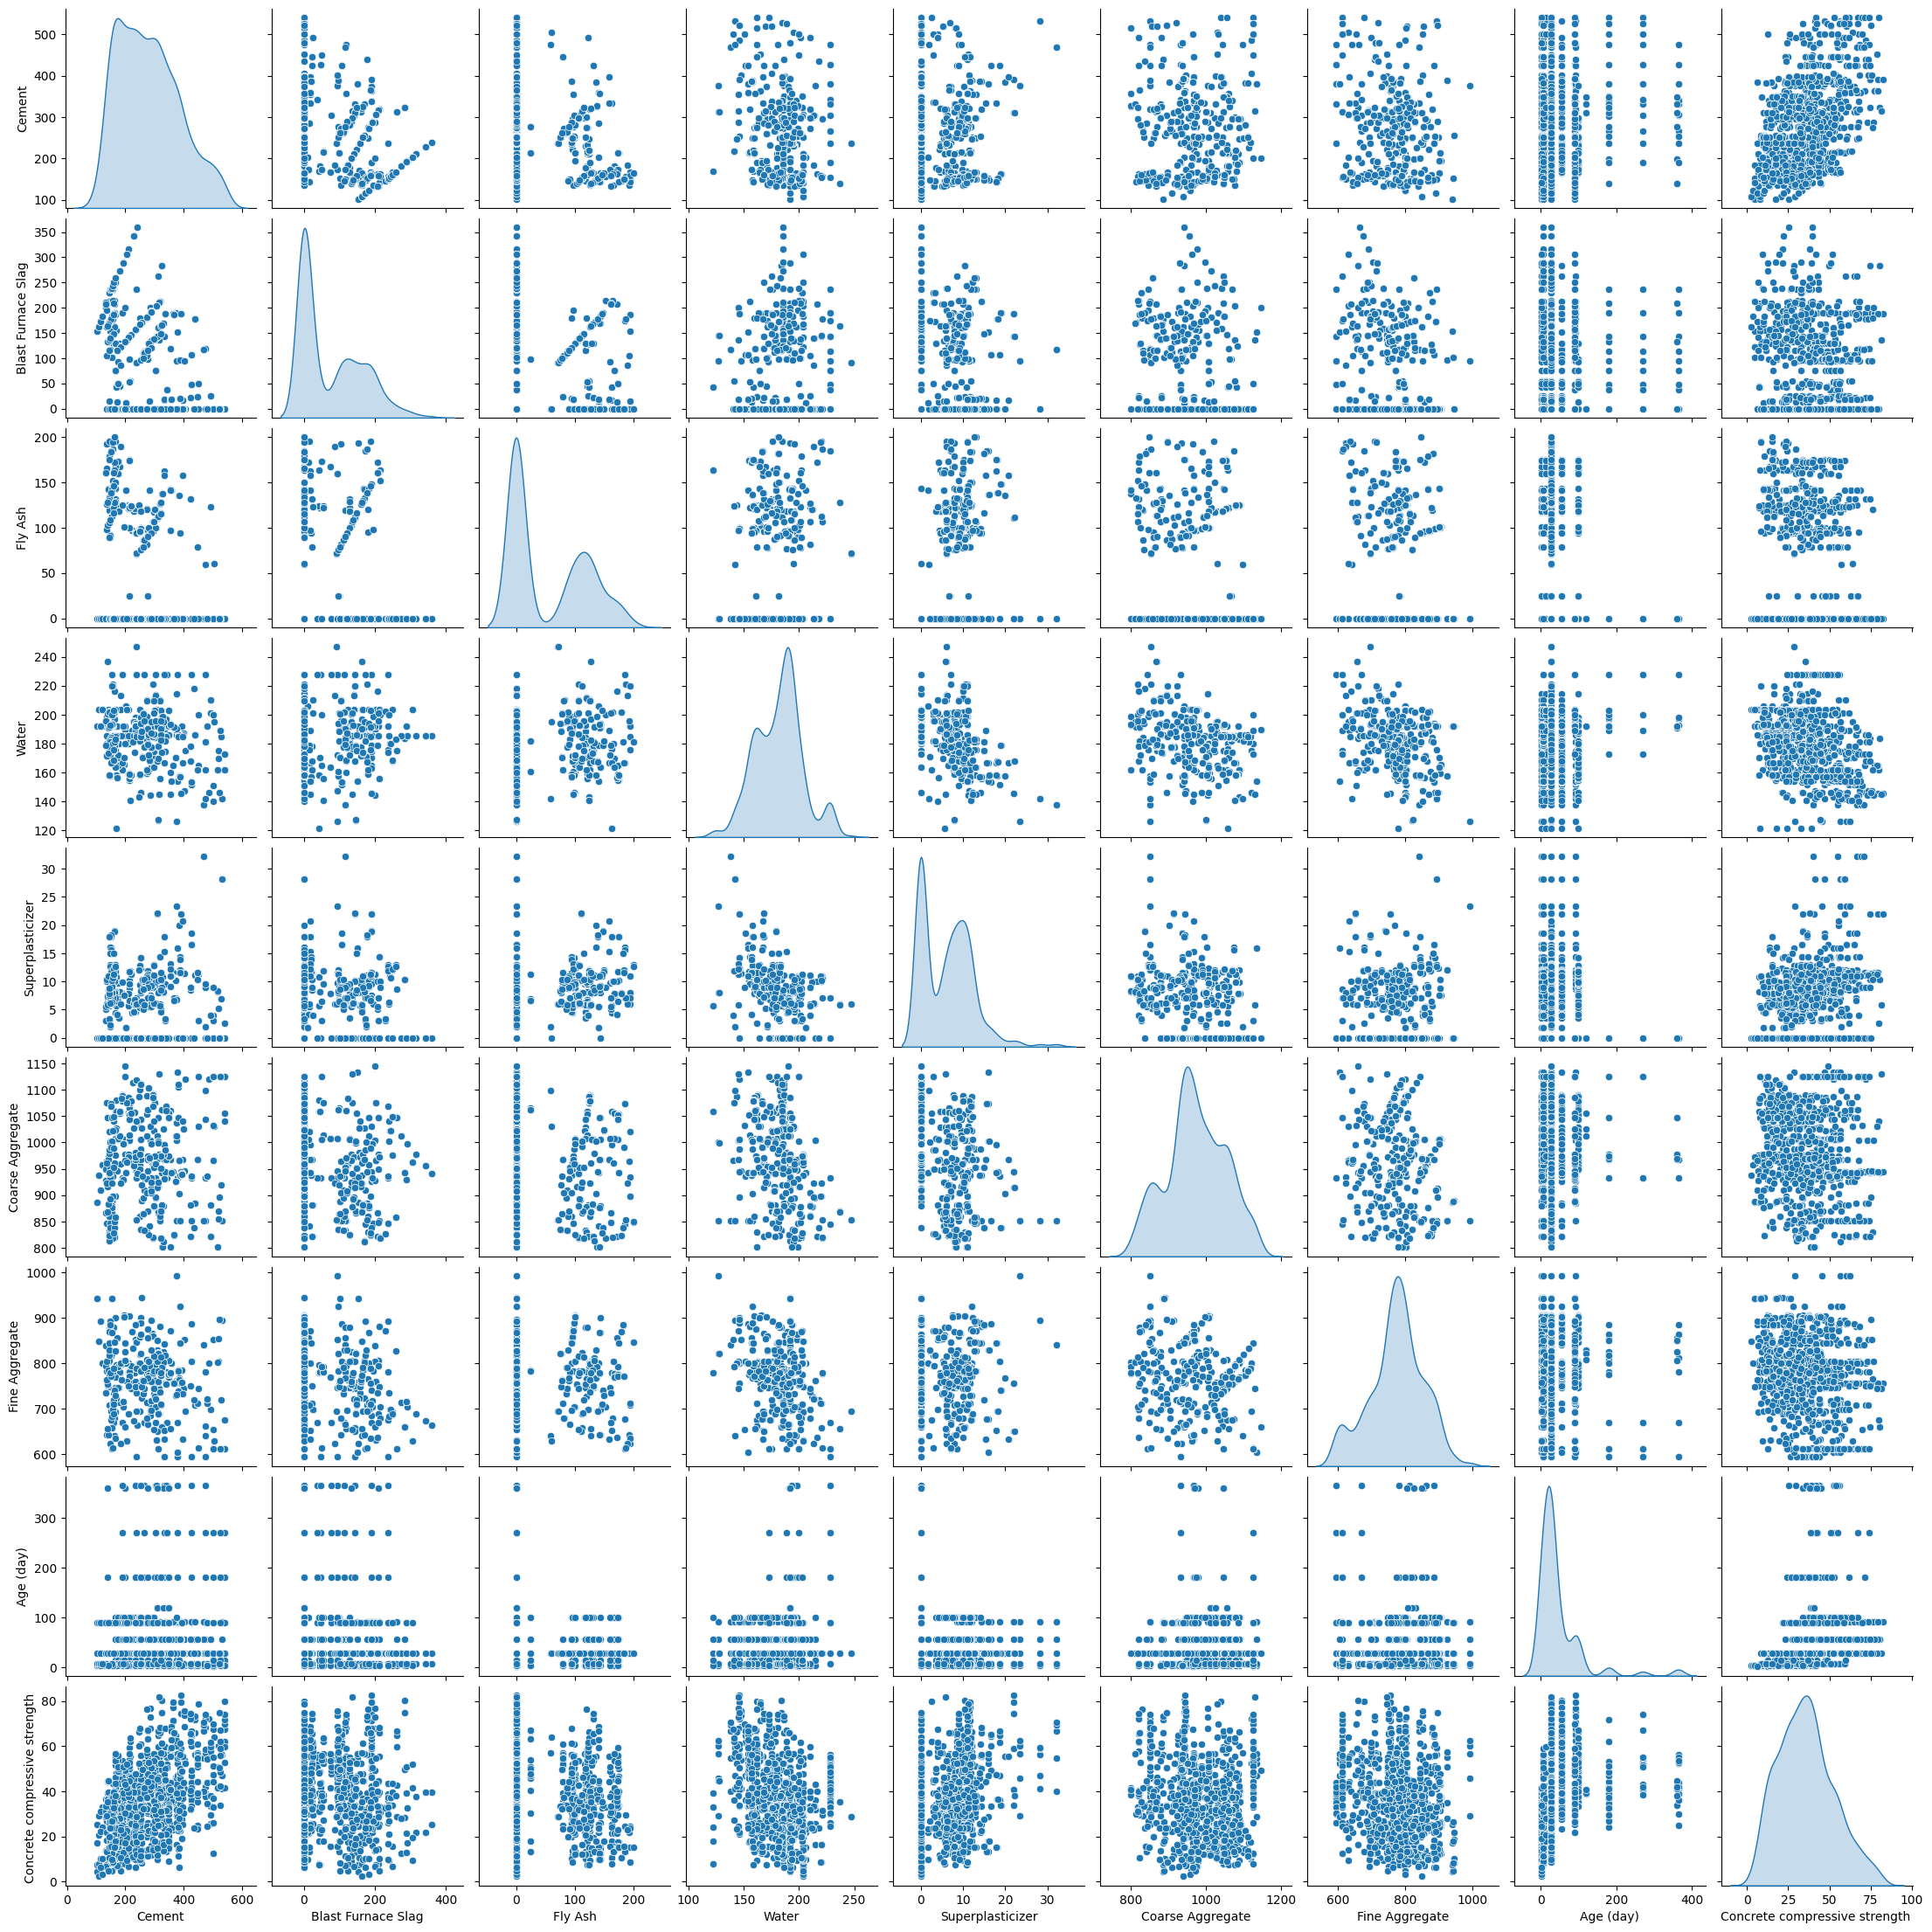

In [105]:
# Checking the pair plot for the shape of the data
sns.pairplot(data, diag_kind='kde')
plt.show()

# 5. Feature Engineering

In [106]:
# creating feature and label

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [107]:
X.var()

,0
Cement,10921.742654
Blast Furnace Slag,7444.083725
Fly Ash,4095.548093
Water,456.060245
Superplasticizer,35.682602
Coarse Aggregate,6045.656228
Fine Aggregate,6428.099159
Age (day),3990.437729


In [108]:
# normalizing features
# let's add 1 to each value in everycolumn so that we don't get exception while calculating the log value of 0

for column in X.columns:
    X[column] += 1
    X[column] = np.log(X[column])

In [109]:
X.var()

,0
Cement,0.143939
Blast Furnace Slag,5.816392
Fly Ash,5.641045
Water,0.014066
Superplasticizer,1.333888
Coarse Aggregate,0.006475
Fine Aggregate,0.011292
Age (day),1.233057


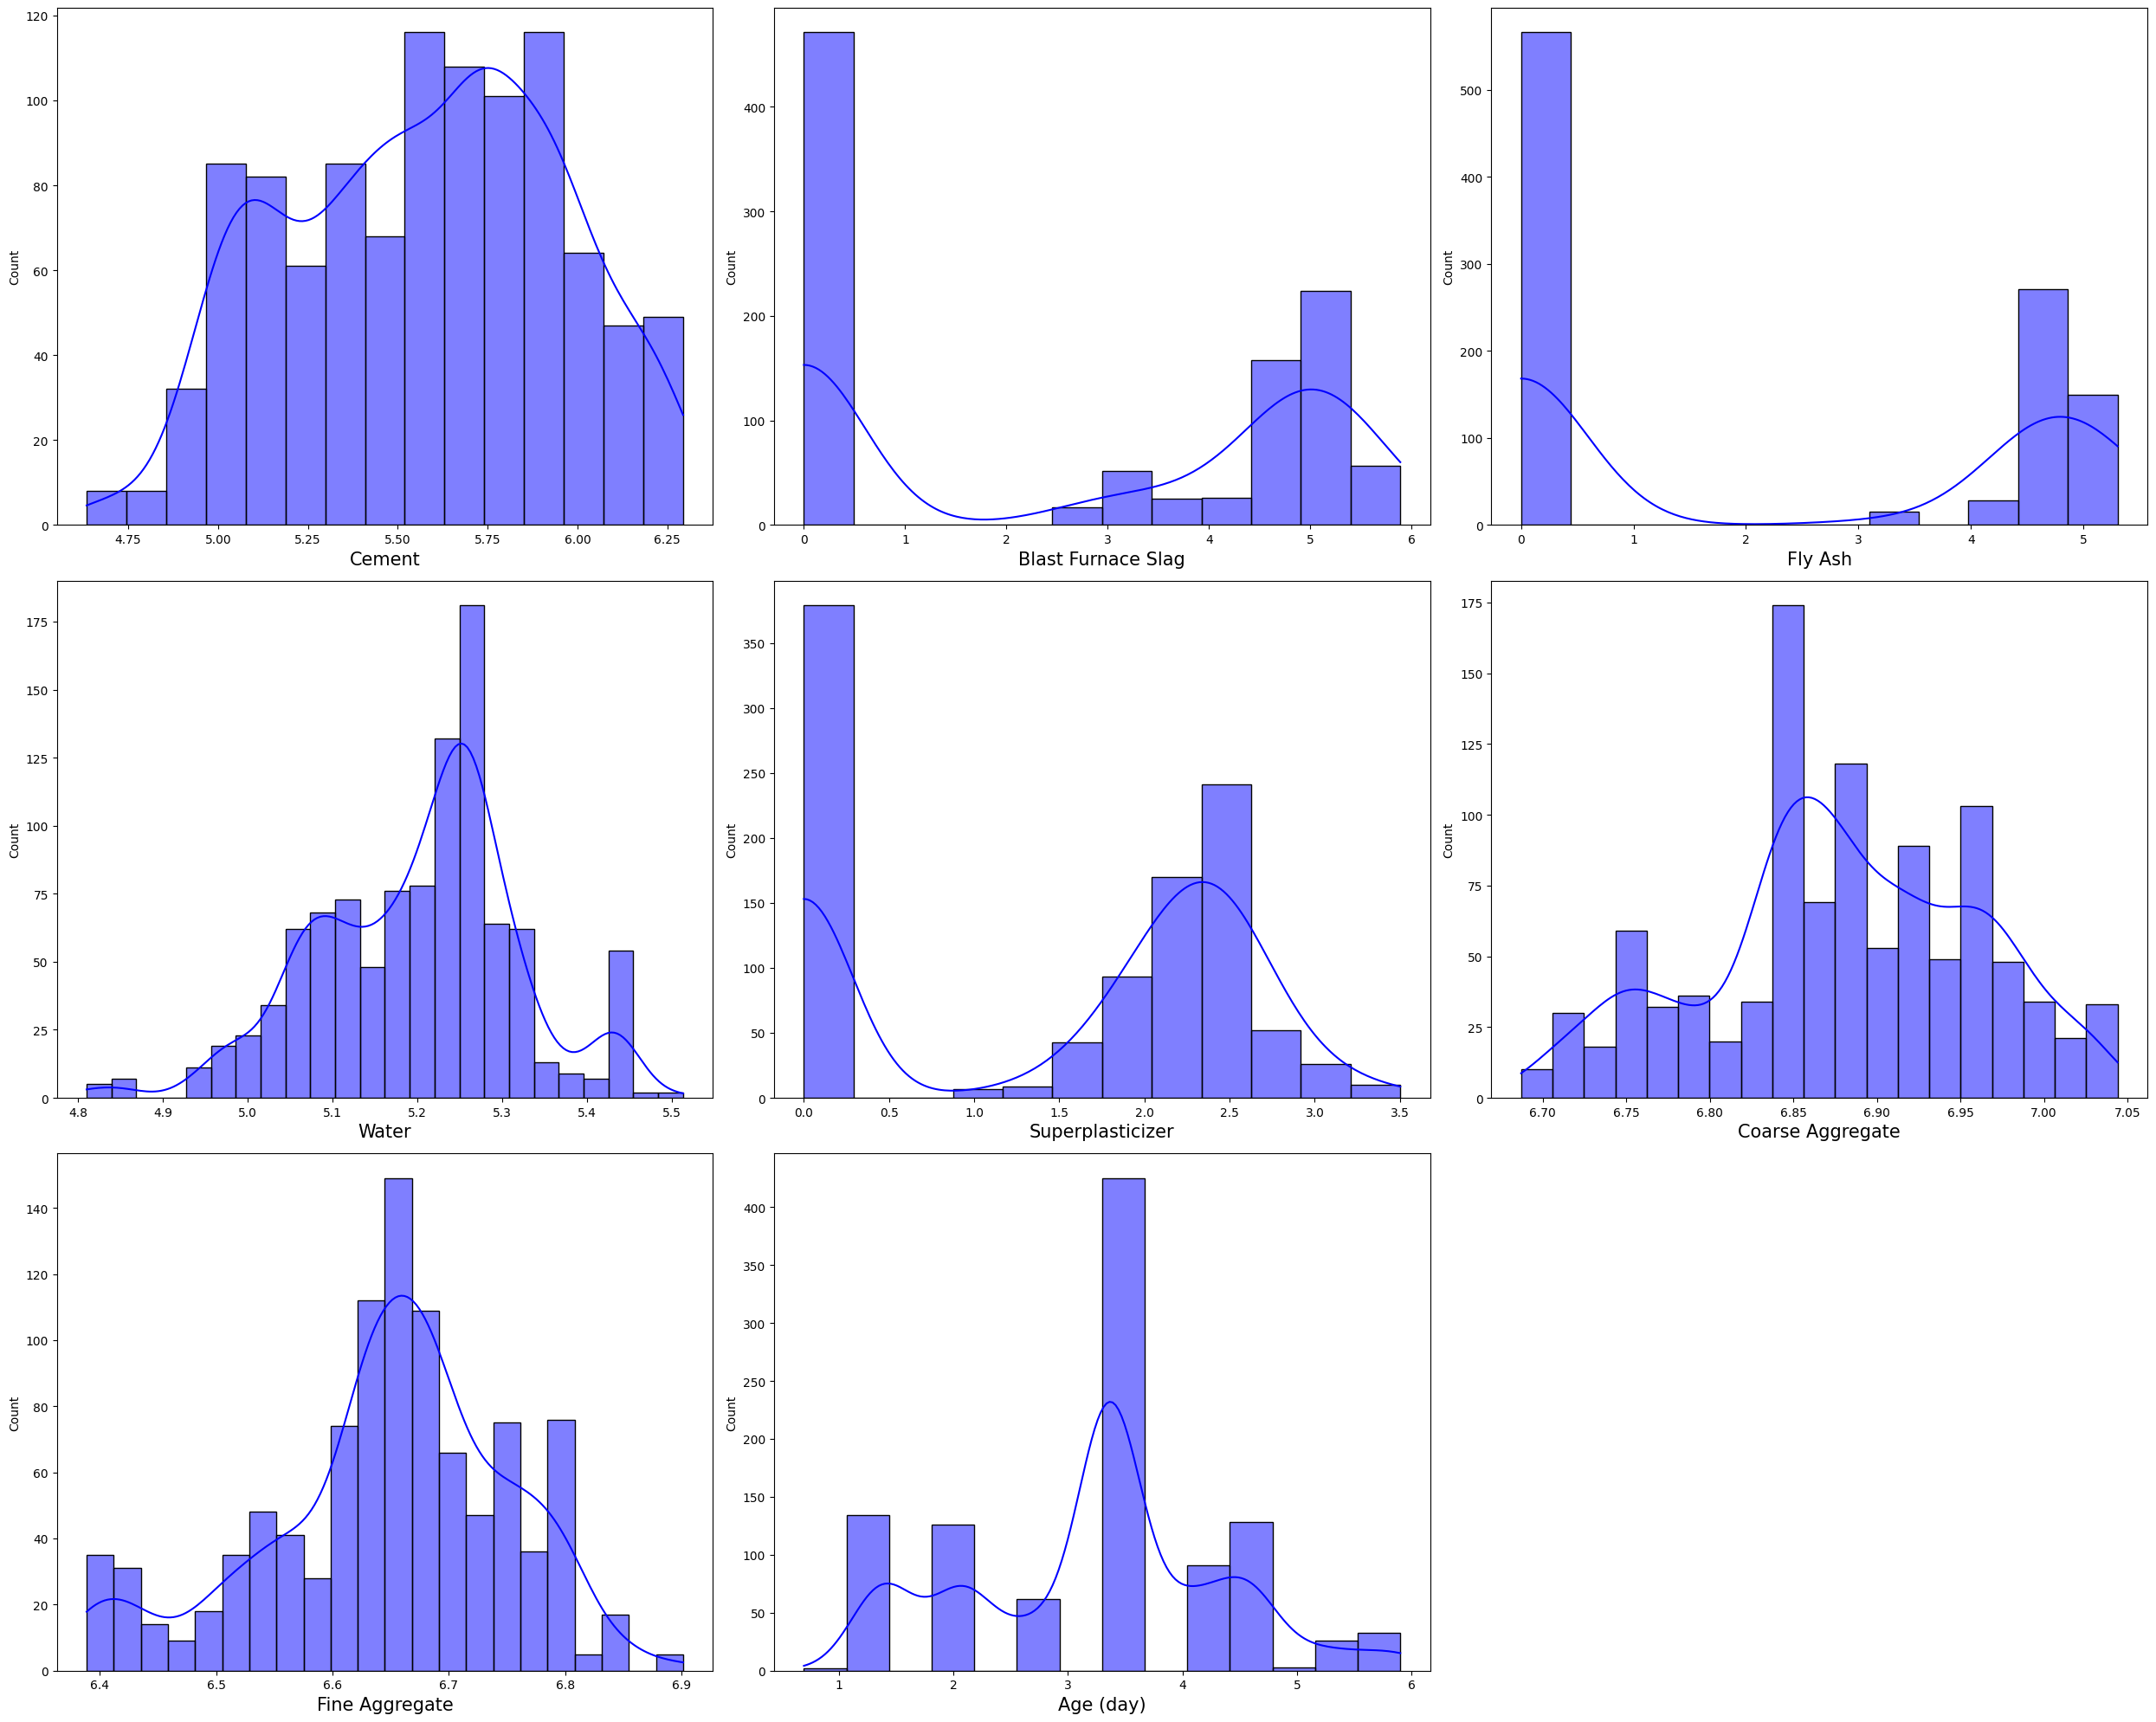

In [110]:
# Again chcking the outliers
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(X[col], kde=True, color='blue')
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

Result: Now data is normalized

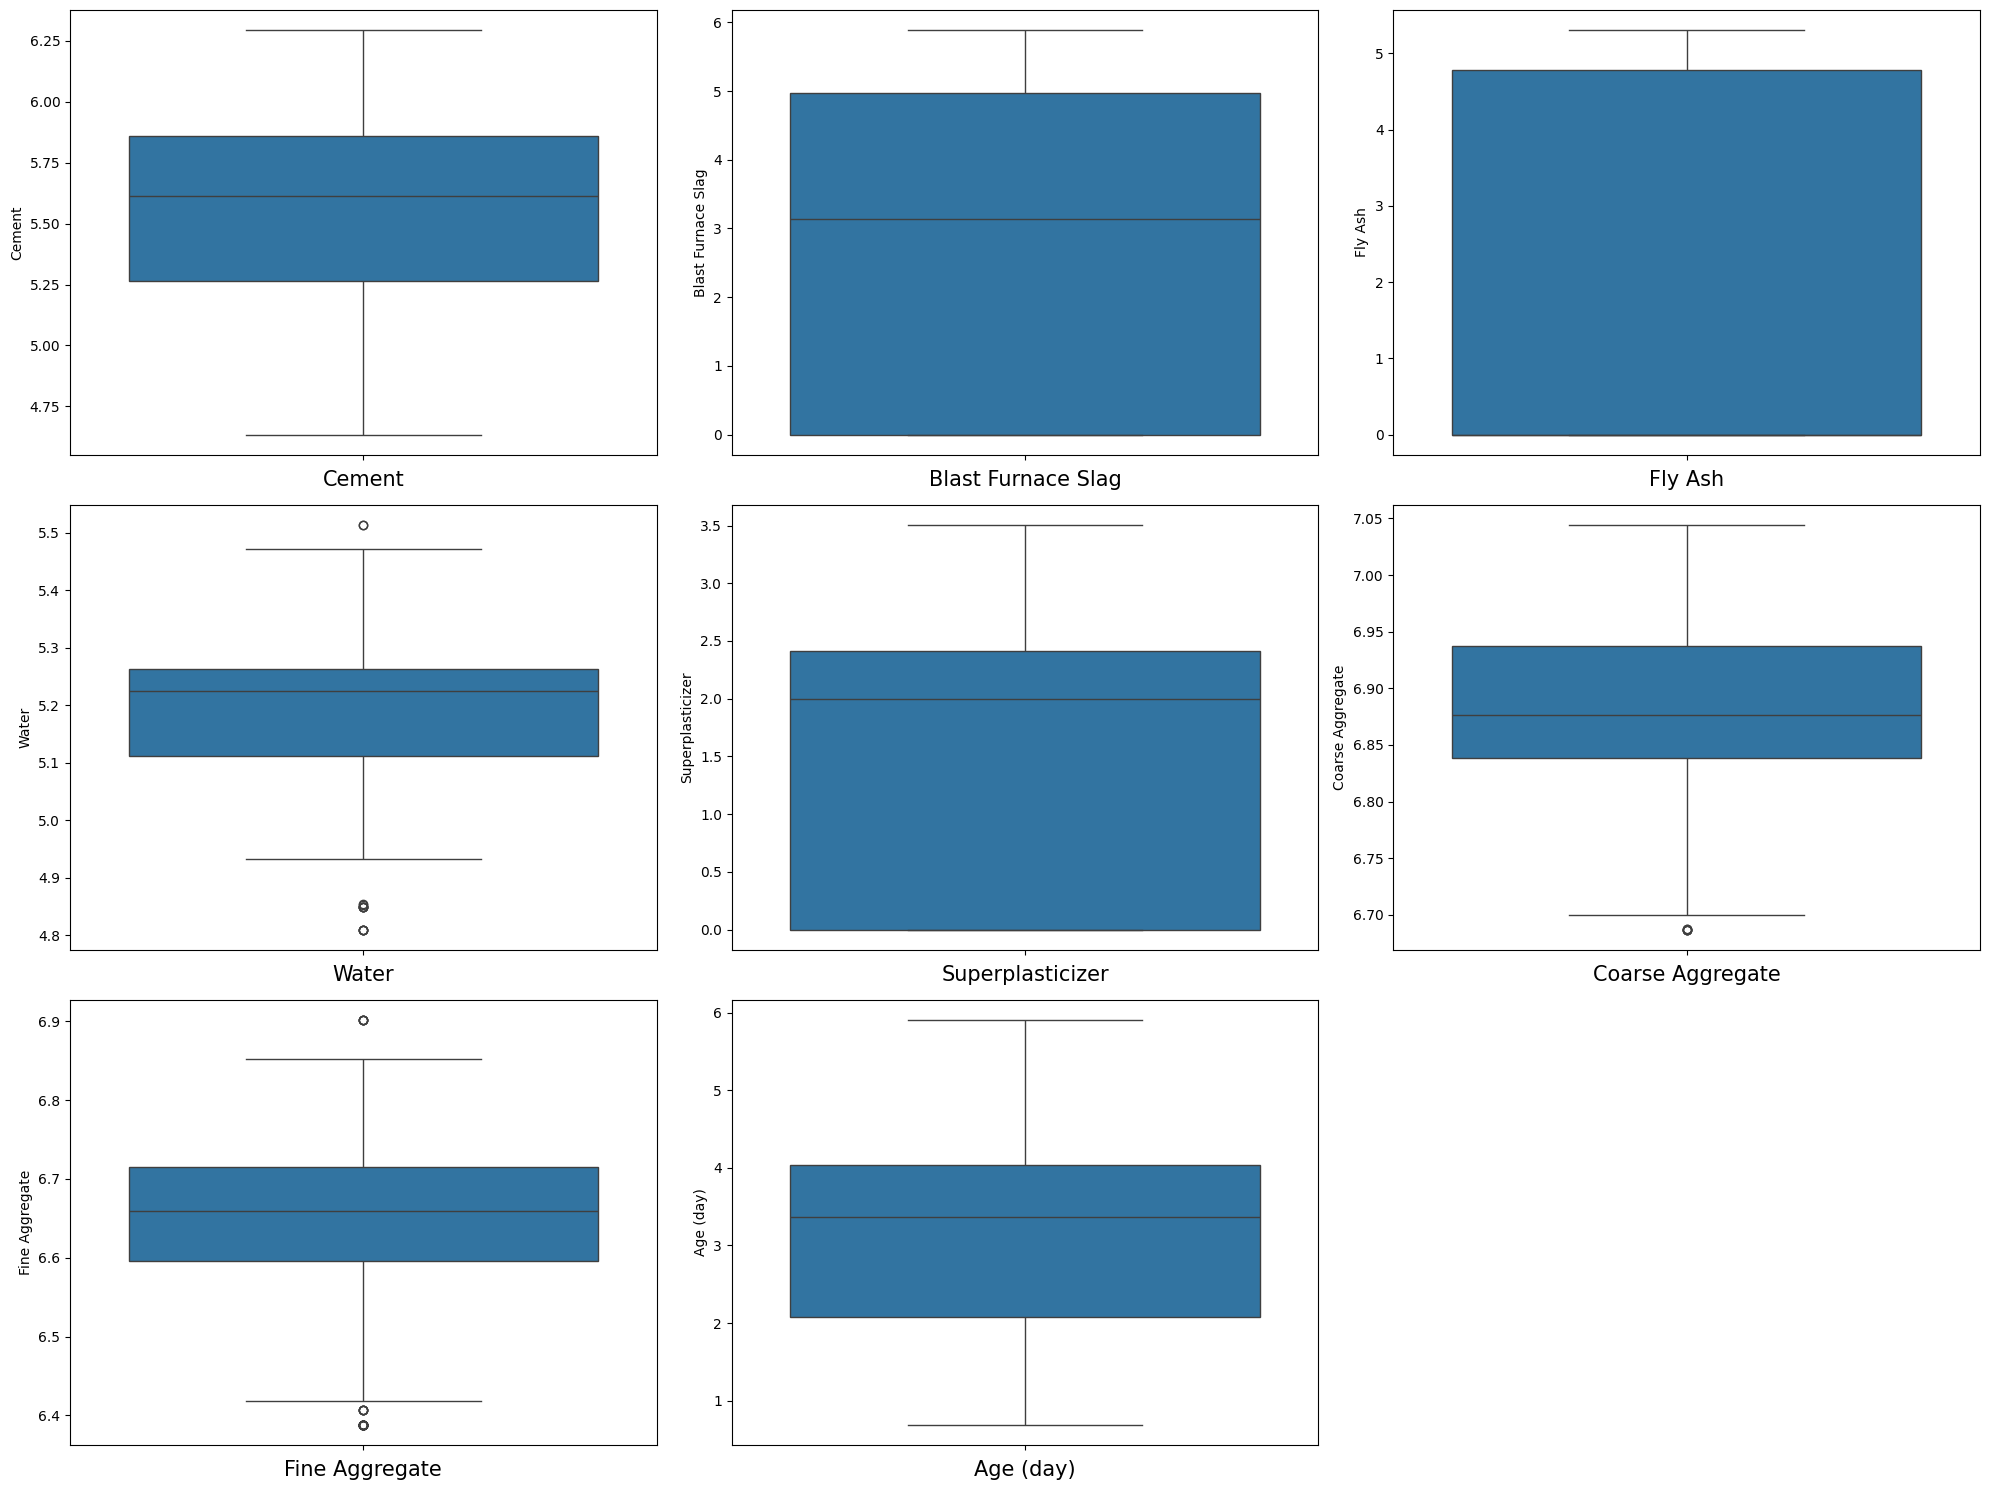

In [111]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1
plt.tight_layout()
plt.show()

Now as we can see there are no more outliers anymore which we have seen earlier

# 6. Spliting the training and the testing data

In [112]:
# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# 7. Training the Machine Learning Model

In [113]:
print("\nSummary of Model Performance (with R2 as accuracy):\n")
print(results_df[['Model', 'R2']])

best_model_accuracy = results_df.loc[results_df['R2'].idxmax()]
print(f"\nModel with the highest R2 (accuracy):\n")
print(f"Model: {best_model_accuracy['Model']}")
print(f"R2 Score: {best_model_accuracy['R2']:.4f}")


Summary of Model Performance (with R2 as accuracy):

                       Model        R2
0          Linear Regression  0.820056
1                      Ridge  0.819212
2                 ElasticNet  0.580683
3      RandomForestRegressor  0.924983
4  GradientBoostingRegressor  0.921171
5                        SVR  0.607146
6        KNeighborsRegressor  0.856781
7               XGBRegressor  0.941730
8              LGBMRegressor  0.953007
9          CatBoostRegressor  0.961164

Model with the highest R2 (accuracy):

Model: CatBoostRegressor
R2 Score: 0.9612


In [117]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'XGBRegressor': XGBRegressor(objective='reg:squarederror'), # Specify objective for XGBoost
    'LGBMRegressor': LGBMRegressor(),
    'CatBoostRegressor': CatBoostRegressor(verbose=0)
}

print("Models initialized successfully.")

Models initialized successfully.


##Train and Evaluate Models



In [115]:
model_names = []
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append results to lists
    model_names.append(name)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)

# Create a DataFrame from the collected results
results_df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_scores,
    'RMSE': rmse_scores,
    'MAE': mae_scores,
    'R2': r2_scores
})

print("Model training and evaluation complete. Results stored in 'results_df'.")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 8
[LightGBM] [Info] Start training from score 35.955101
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

## Display Model Performance



In [116]:
print("\nSummary of Model Performance:\n")
print(results_df)

best_model_row = results_df.loc[results_df['RMSE'].idxmin()]
print(f"\nBest performing model based on lowest RMSE:\n")
print(f"Model: {best_model_row['Model']}")
print(f"RMSE: {best_model_row['RMSE']:.4f}")


Summary of Model Performance:

                       Model         MSE       RMSE       MAE        R2
0          Linear Regression   59.926634   7.741229  5.880310  0.804270
1                      Ridge   60.230640   7.760840  5.880648  0.803277
2                 ElasticNet  151.505335  12.308750  9.963323  0.505159
3      RandomForestRegressor   28.356890   5.325119  3.730198  0.907382
4  GradientBoostingRegressor   29.748747   5.454241  3.976320  0.902836
5                        SVR  144.577655  12.024045  9.643749  0.527786
6        KNeighborsRegressor   58.974932   7.679514  5.340859  0.807378
7               XGBRegressor   22.738174   4.768456  2.982652  0.925734
8              LGBMRegressor   20.680795   4.547614  3.034878  0.932453
9          CatBoostRegressor   16.049986   4.006243  2.549641  0.947578

Best performing model based on lowest RMSE:

Model: CatBoostRegressor
RMSE: 4.0062


In [123]:
import pickle

# To Save:
with open('cement_model.pkl', 'wb') as file:
    pickle.dump(cement_model.pkl, file)

NameError: name 'cement_model' is not defined